<!-- Styling for exporting notebooks -->
<style>
h1, h2, h3, h4, h5, h6 {
    page-break-after: avoid;
    page-break-inside: avoid;
}
p, ul, ol {
    page-break-inside: avoid;
}
</style>

# Exploratory Data Analysis (EDA): Iris Dataset

**Authors**: Rezekiel Ugang, Andrian Lloyd Maagma, Bilicia Sachi Sarmiento

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrianllmm/ds100-ws1/blob/main/notebooks/eda.ipynb)
[![View on GitHub](https://img.shields.io/badge/View%20on-GitHub-black?logo=github)](https://github.com/andrianllmm/ds100-ws1/blob/main/notebooks/eda.ipynb)

---

## Introduction

This notebook presents an exploratory data analysis (EDA) of the [Iris dataset](https://archive.ics.uci.edu/dataset/53/iris), a classic dataset containing measurements of iris flowers.

The objective of this analysis is to examine the dataset’s structure, summarize its statistical properties, and identify patterns or relationships among the variables.

The dataset consists of 150 observations across three species (*Iris setosa*, *Iris versicolor*, and *Iris virginica*) with four numeric features: sepal length, sepal width, petal length, and petal width.

<p align="center">
  <img src="https://raw.githubusercontent.com/andrianllmm/ds100-ws1/main/images/iris.png" alt="Iris image" width="500">
</p>

## Setup

We start by importing the libraries we will need and loading the dataset with meaningful column names.

In [ ]:
# Import essential libraries
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({
    "figure.dpi": 150,
    "figure.figsize": (4, 3),
    "figure.autolayout": True,
})
%config InlineBackend.figure_format = 'retina'

In [2]:
# Load Iris dataset directly from GitHub avoiding local files
url = "https://raw.githubusercontent.com/andrianllmm/ds100-ws1/main/data/iris.data"

# Dataset does not contain headers, so we manually specify column names
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]

# Load dataset into a Pandas DataFrame
df = pd.read_csv(url, header=None, names=columns)

# Get numeric columns only for further analysis
numeric_df = df.select_dtypes(include='number')

## Dataset Overview and Basic Stats

*1. Show the first 5 rows of the dataset.*

Previewing data ensures that it is loaded correctly and we understand its basic structure.

In [3]:
# Preview the first 5 rows
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*2. Use `.info()` and `.describe()` to understand structure and summary statistics.*

All columns are correctly typed (`float` for measurements, `object` for species).

There's no missing values (each column has 150 non-null values), which means there's no need for imputation.

In [4]:
# Display summary information about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Generate descriptive statistics for numeric features
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


*3. Compute the mean, median, and standard deviation for all numeric features.*

The mean, median, and standard deviation vary from feature to feature.

In [6]:
# Compute mean, median, and standard deviation for each numeric feature
pd.DataFrame({
    'Mean': numeric_df.mean(),
    'Median': numeric_df.median(),
    'Standard Deviation': numeric_df.std()
})

,Mean,Median,Standard Deviation
sepal_length,5.843333,5.80,0.828066
sepal_width,3.054000,3.00,0.433594
petal_length,3.758667,4.35,1.764420
petal_width,1.198667,1.30,0.763161


*4. Compare the averages of petal length by species.*

The mean under sepal length and width are mostly the same for each species. Whereas the mean under petal length and width are mostly different for each species.

In [7]:
# Group data by species and calculate the mean of each numeric feature
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


Taking a closer look at the petal length data, we see that the mean varies greatly from one species to another.  Take setosa for example, its average petal length is significantly less than the other species'.

In [8]:
# Mean petal length by species
df.groupby('species')[['petal_length']].mean()

,petal_length
species,
Iris-setosa,1.464
Iris-versicolor,4.260
Iris-virginica,5.552


*5. Identify which feature shows the greatest variation.*

Standard deviation tells us which feature varies the most.
High variation indicates that feature could help differentiate species (can be useful later).

In our dataset, **petal length** has the highest variation.

In [9]:
# Identify which numeric feature has the greatest variation
std_dev = numeric_df.std()
print("Feature with greatest variation:", std_dev.idxmax())
print("Standard deviation:", round(std_dev.max(), 4))

Feature with greatest variation: petal_length
Standard deviation: 1.7644


## Visualizations

*6. Create at least three plots: a histogram of one numeric feature, a bar chart of species
counts, and a scatter plot (e.g., petal length vs. petal width).*

### Histrograms and Bar Charts

Visualizing distributions helps spot skewness and outliers.

In [10]:
# Helper to plot the distribution of a numeric feature
def plot_distribution(df, col):
    sns.histplot(data=df, x=col, bins=20, kde=True, hue='species', alpha=0.25) # add KDE curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Sepal length and width distributions are slightly skewed to the left (lower values) with only one cluster.

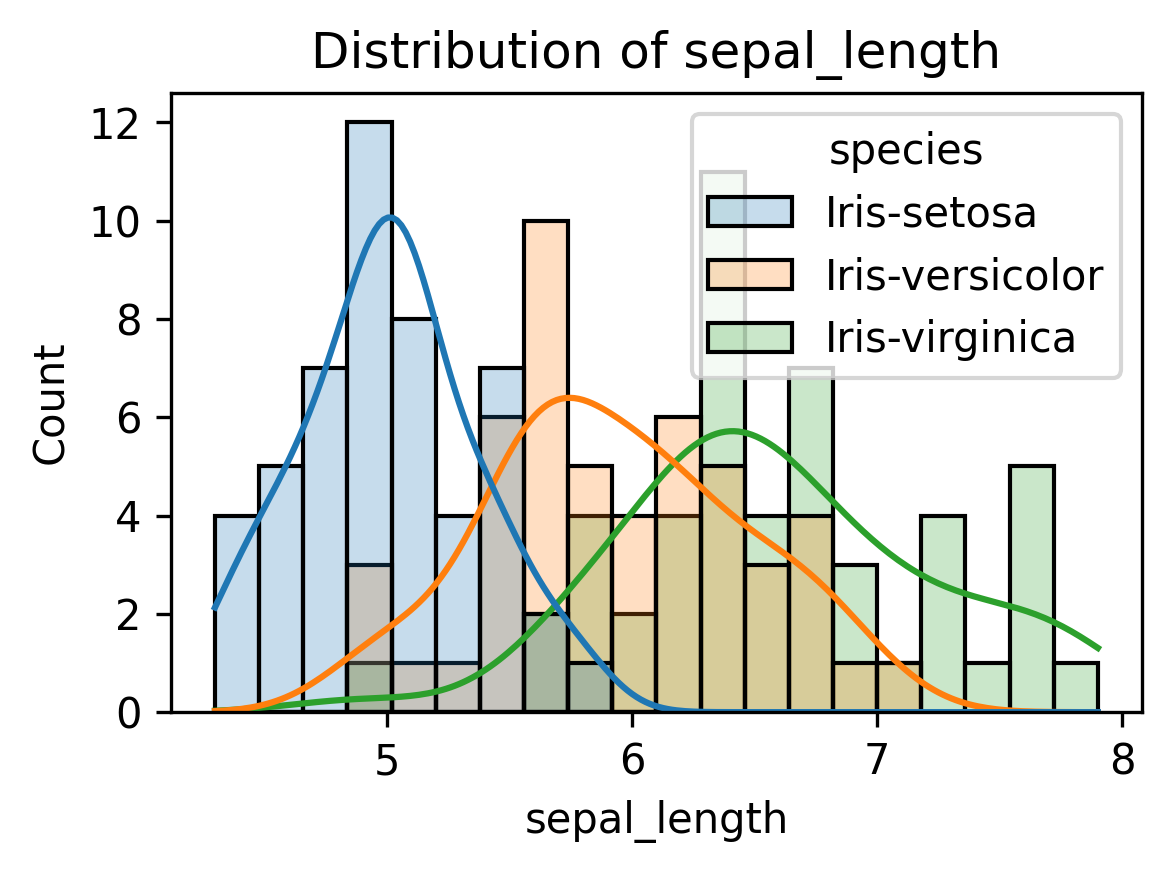

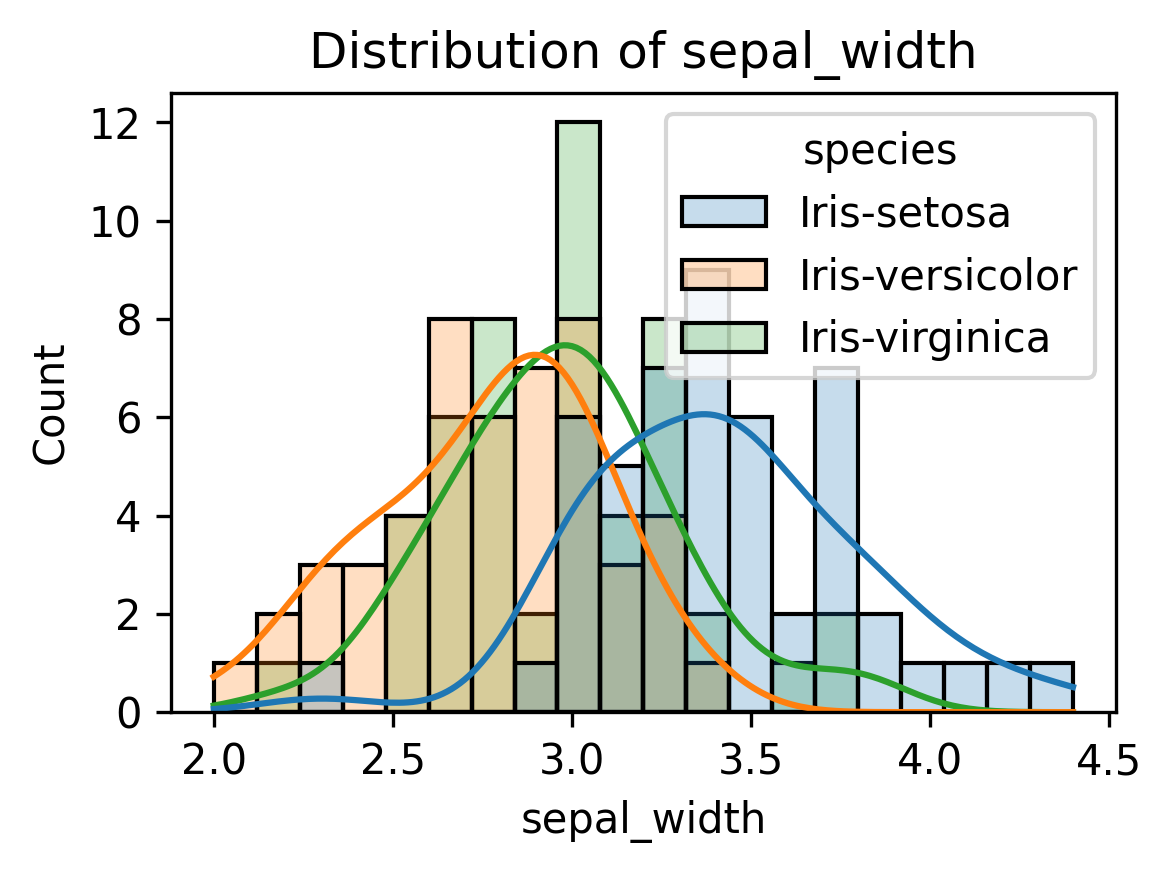

In [11]:
plot_distribution(df, col='sepal_length')
plot_distribution(df, col='sepal_width')

For petal length and width distributions, there's a skew towards the right (lower values) with two noticeable clusters: setosa and the other two which slightly overlaps. 

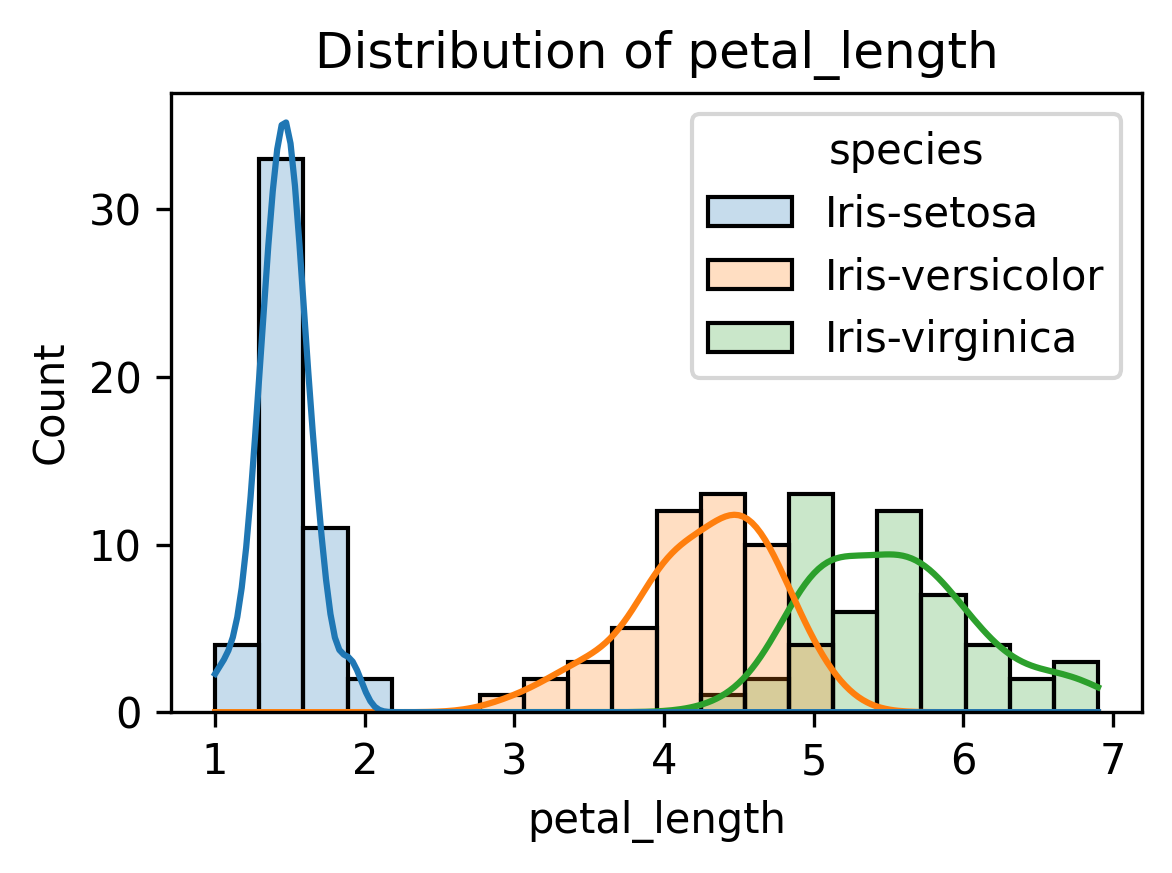

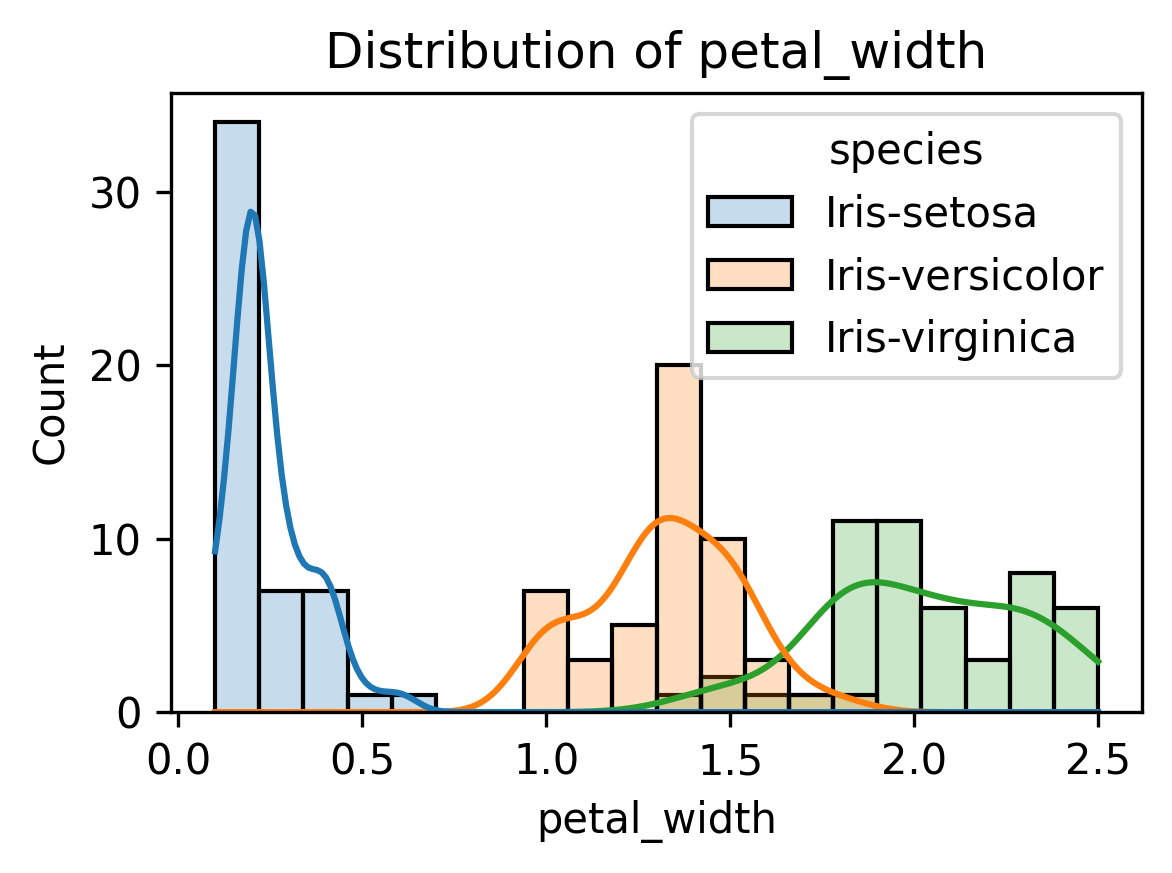

In [12]:
plot_distribution(df, col='petal_length')
plot_distribution(df, col='petal_width')

The dataset is balanced across species (50 samples each).
Balanced data is ideal for later tasks, such as classification.

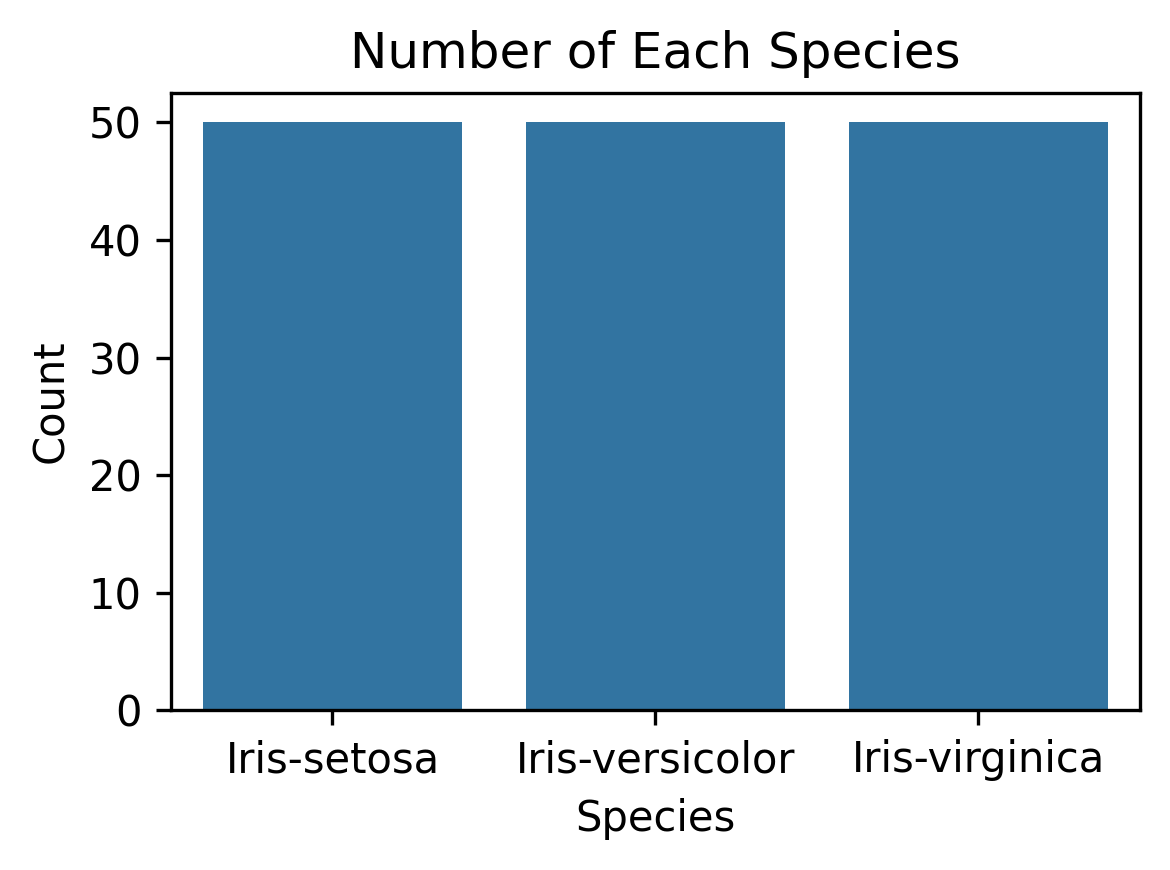

In [13]:
sns.countplot(data=df, x='species')
plt.title('Number of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

### Scatter

Visualizing relationship between two features help identify patterns and separability between species.

For instance, see how petal dimensions clearly separate setosa from the other species. Let's inspect it more closely.

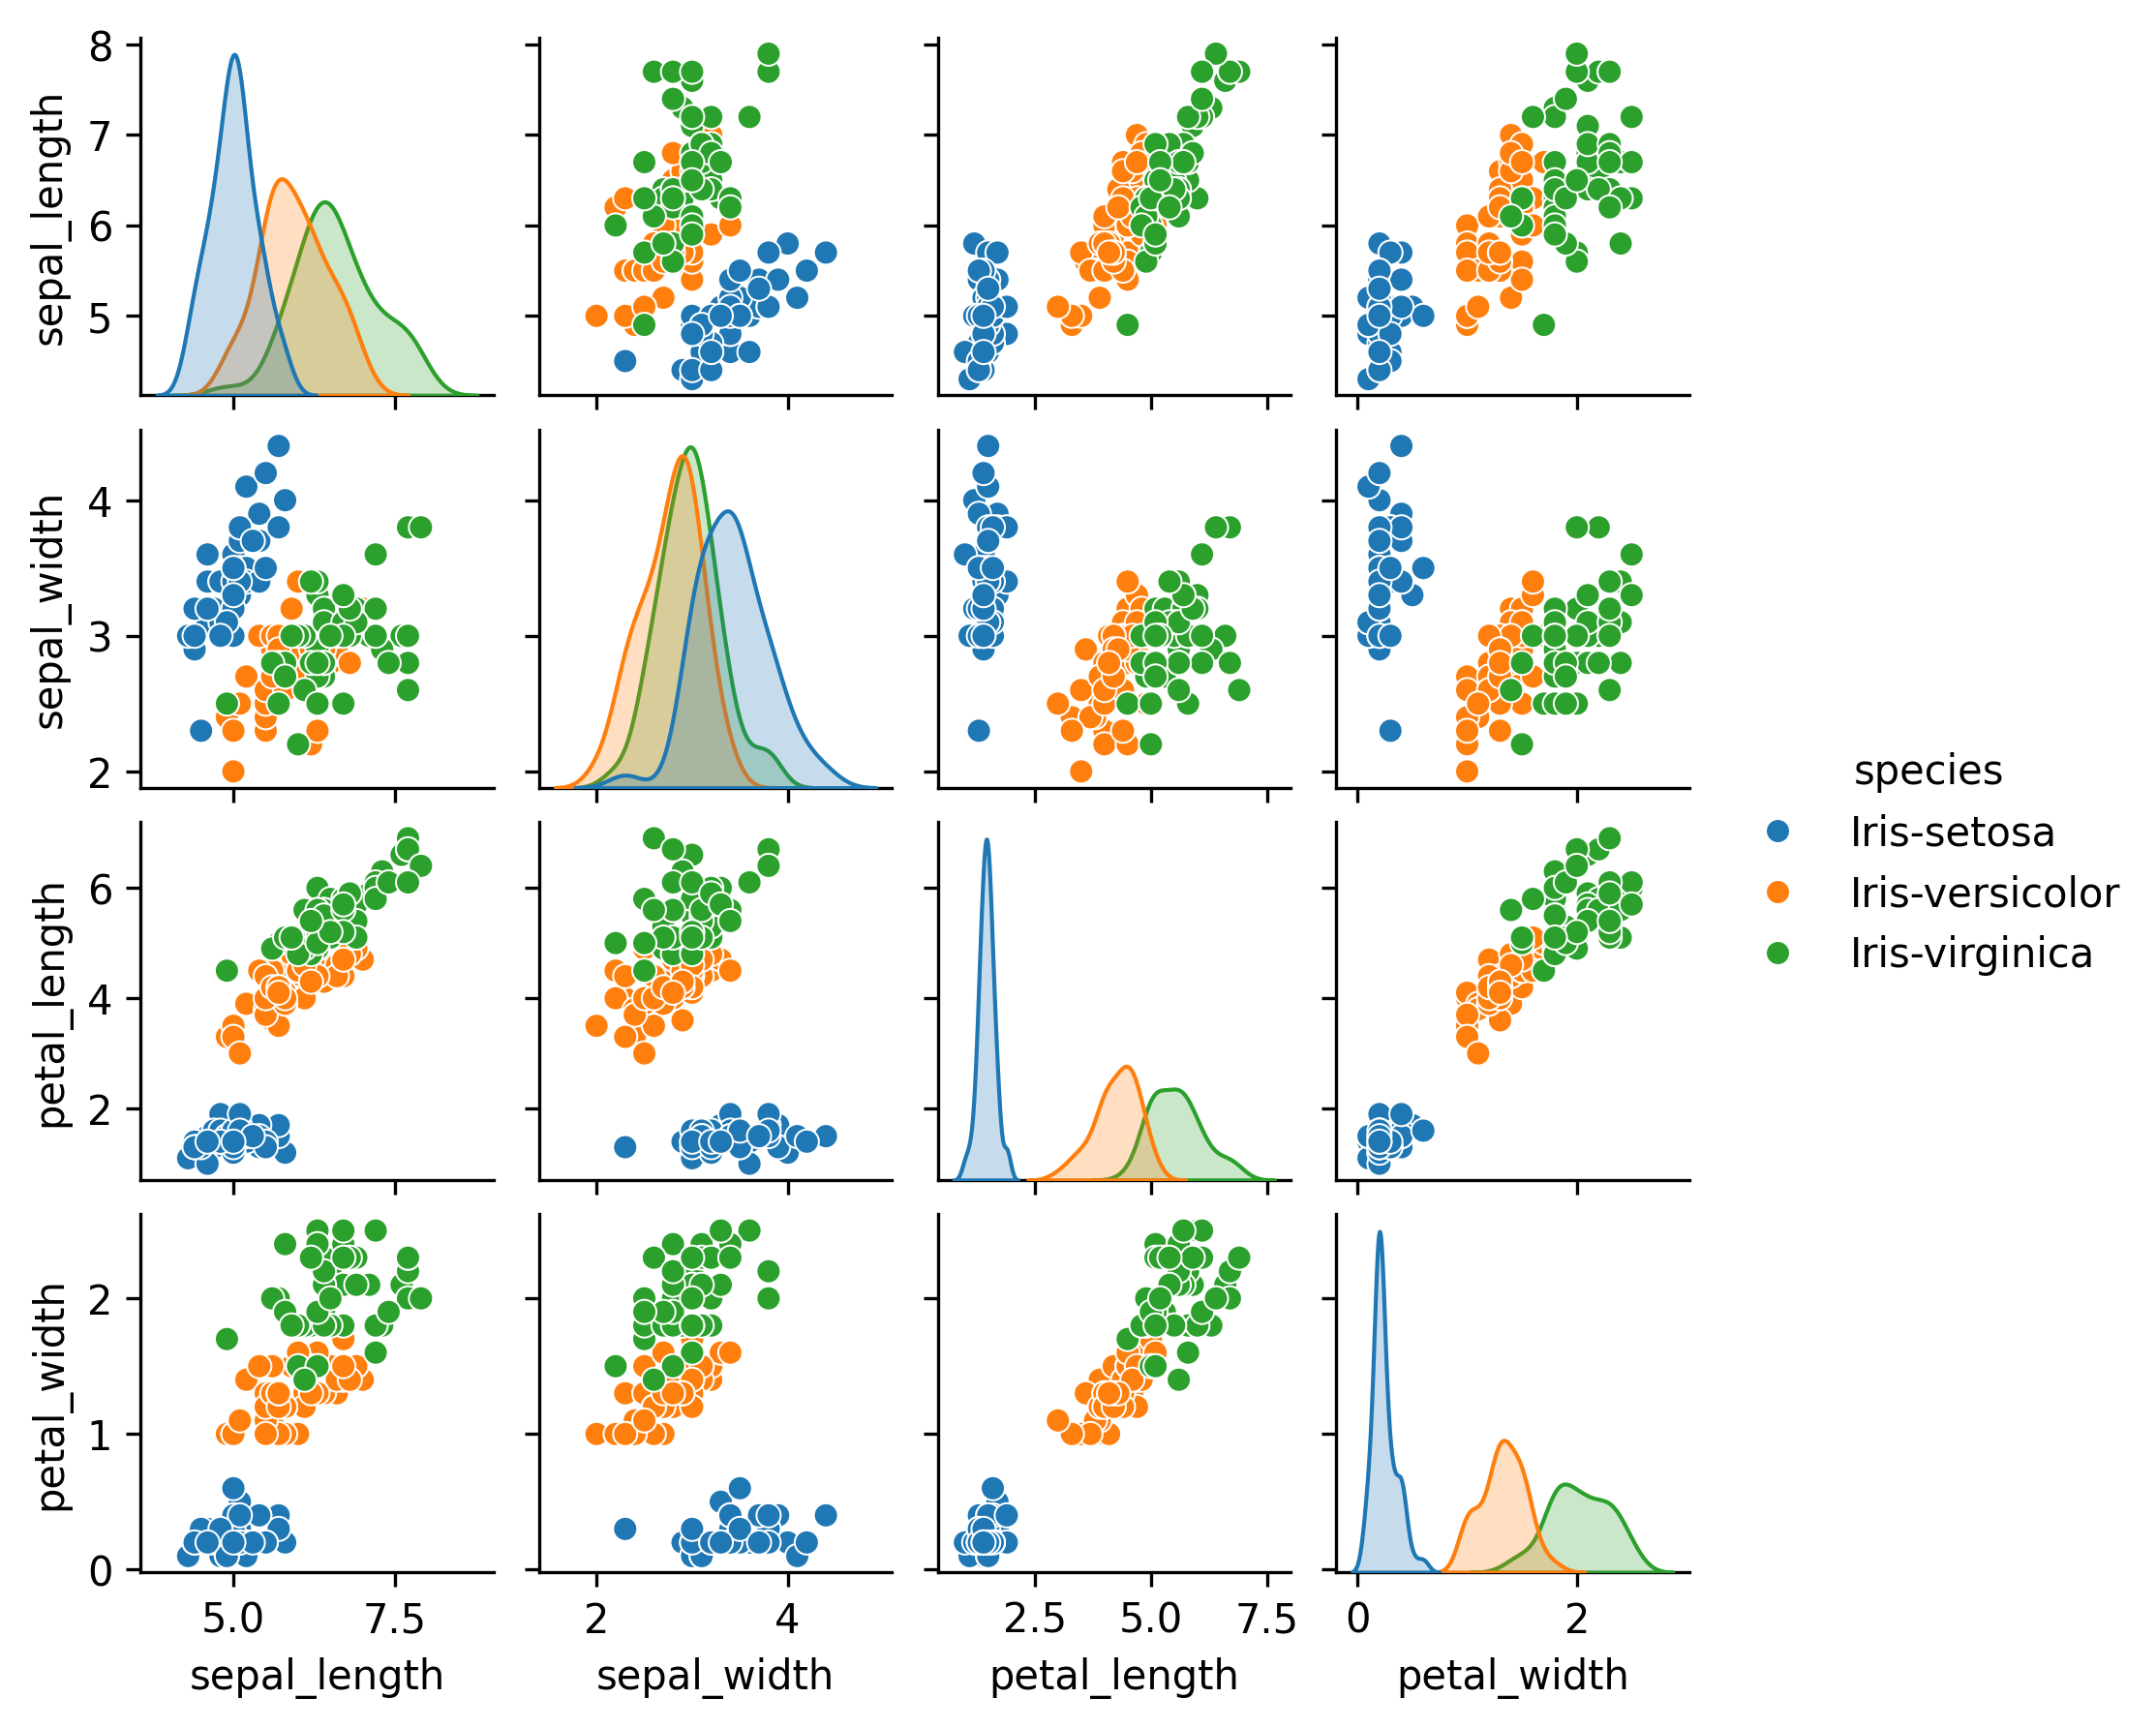

In [14]:
# Shows relationships between all pairs of numeric variables
sns.pairplot(df, hue='species', height=1.5)
plt.show()

The separability between species is apparent:
setosa forms a distinct cluster, while versicolor and virginica overlap slightly, but still separable.

We also see that petal length grows proportionally with petal width in a linear fashion.

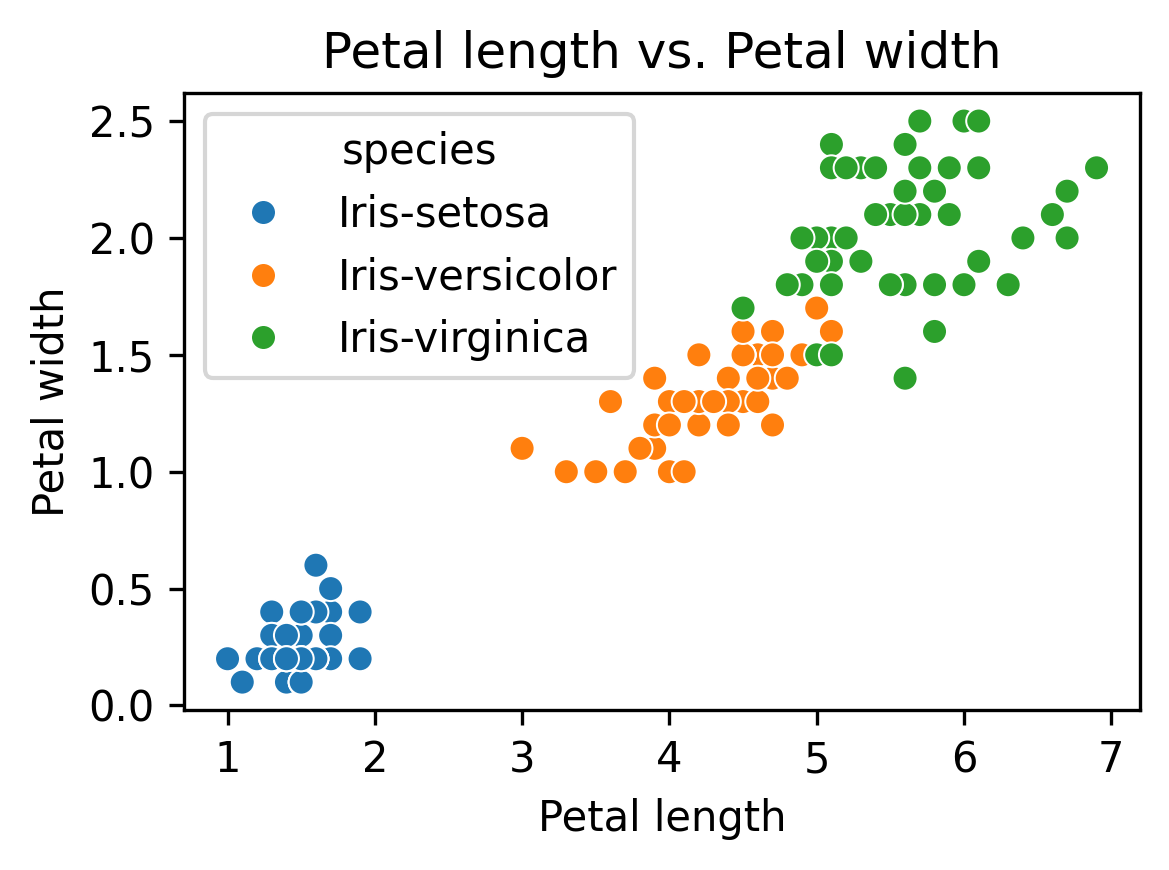

In [15]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.title('Petal length vs. Petal width')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

## Correlation Analysis

*7. Check the correlation between petal length and petal width for each species, and comment on whether the relationship looks stronger for a particular species*

Correlation shows how features vary together. It is determined by the Pearson correlation coefficient which shows the linear relationship of two variables (+1 as a perfectly directly proportional relationship, -1 as a perfectly inverse relationship, and 0 as a no linear relationship). 

We see a moderately high positive correlation between sepal length and petal dimensions.

More importantly, we see a very strong positive correlation between petal length and petal width. Let's inspect it more closely.

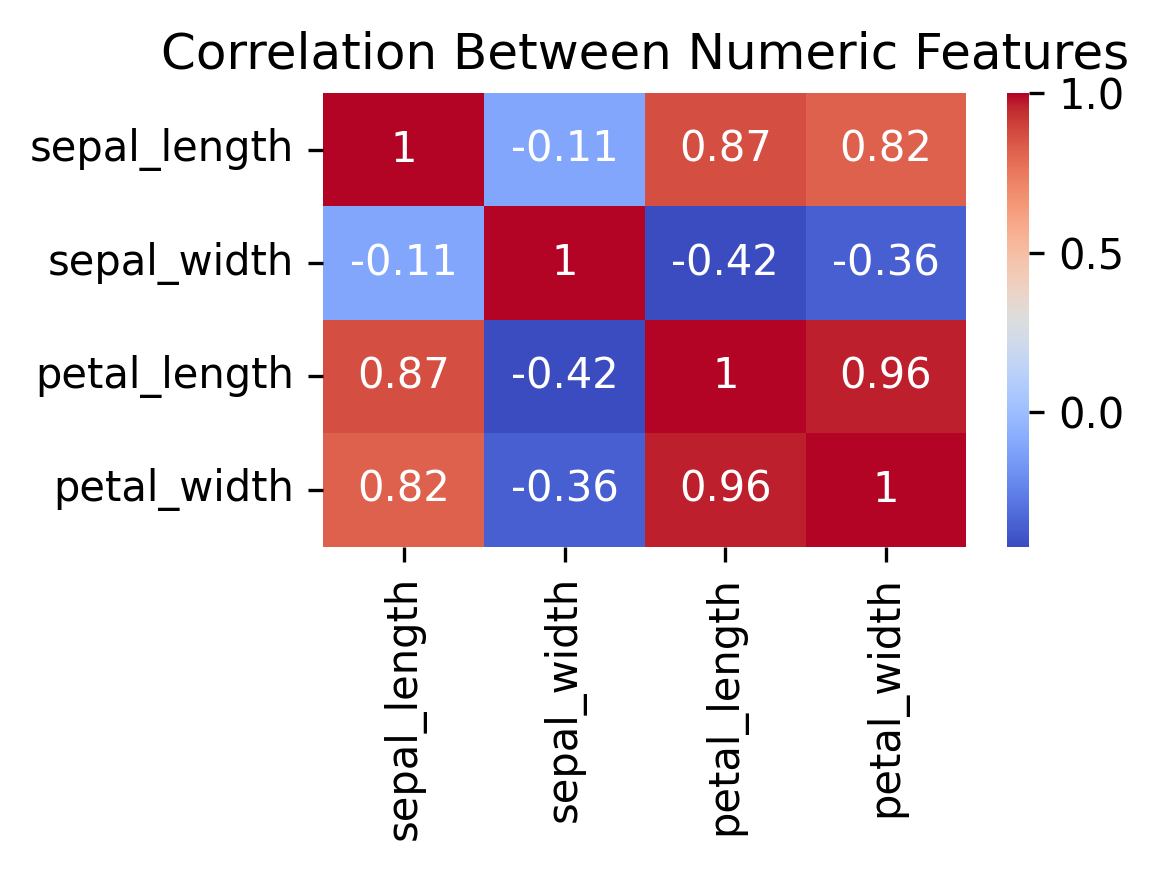

In [16]:
# Correlation between numeric features 
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

Petal length vs width correlations differ slightly by species.

While all species have a positive correlation, versicolor is stronger than setosa and virginicia, which are weaker and closer to each other.

This means that all species have a direct relationship between its petal length vs. its petal width (i.e. as the petal length increases, its petal width also increases). This direct relationship is more evident in the versicolor species, and the least evident in the setosa species.

In [17]:
# Correlation between petal length and width for each species
df.groupby('species')[['petal_length', 'petal_width']].corr()

petal_length  petal_width
species                                                
Iris-setosa     petal_length      1.000000     0.306308
                petal_width       0.306308     1.000000
Iris-versicolor petal_length      1.000000     0.786668
                petal_width       0.786668     1.000000
Iris-virginica  petal_length      1.000000     0.322108
                petal_width       0.322108     1.000000

This correlation can also be viewed as linear trends via regression analysis.

In [18]:
results = []
for s, subset in df.groupby('species'):
    m, b, r_value, p_value, std_err = stats.linregress(subset['petal_length'], subset['petal_width'])
    results.append({
        'Species': s,
        'Slope (m)': m,
        'Intercept (b)': b,
        'r': r_value,
        'R²': r_value**2,
    })
pd.DataFrame(results)

,Species,Slope (m),Intercept (b),r,R²
0,Iris-setosa,0.189262,-0.033080,0.306308,0.093825
1,Iris-versicolor,0.331054,-0.084288,0.786668,0.618847
2,Iris-virginica,0.160297,1.136031,0.322108,0.103754


Versicolor indeed has the highest slope value, indicating a higher linear relationship with a $R^2 \approx 0.6188$. This shows that among the three species, versicolor also has the best statistical model predicting the relationship between the variables.

Both the virginica and setosa dataset show slope values that are close to each other, indicating how near their linear relationship are. They have $R^2 \leq 0.1$, showing the linear model doesn't fit the dataset that well.

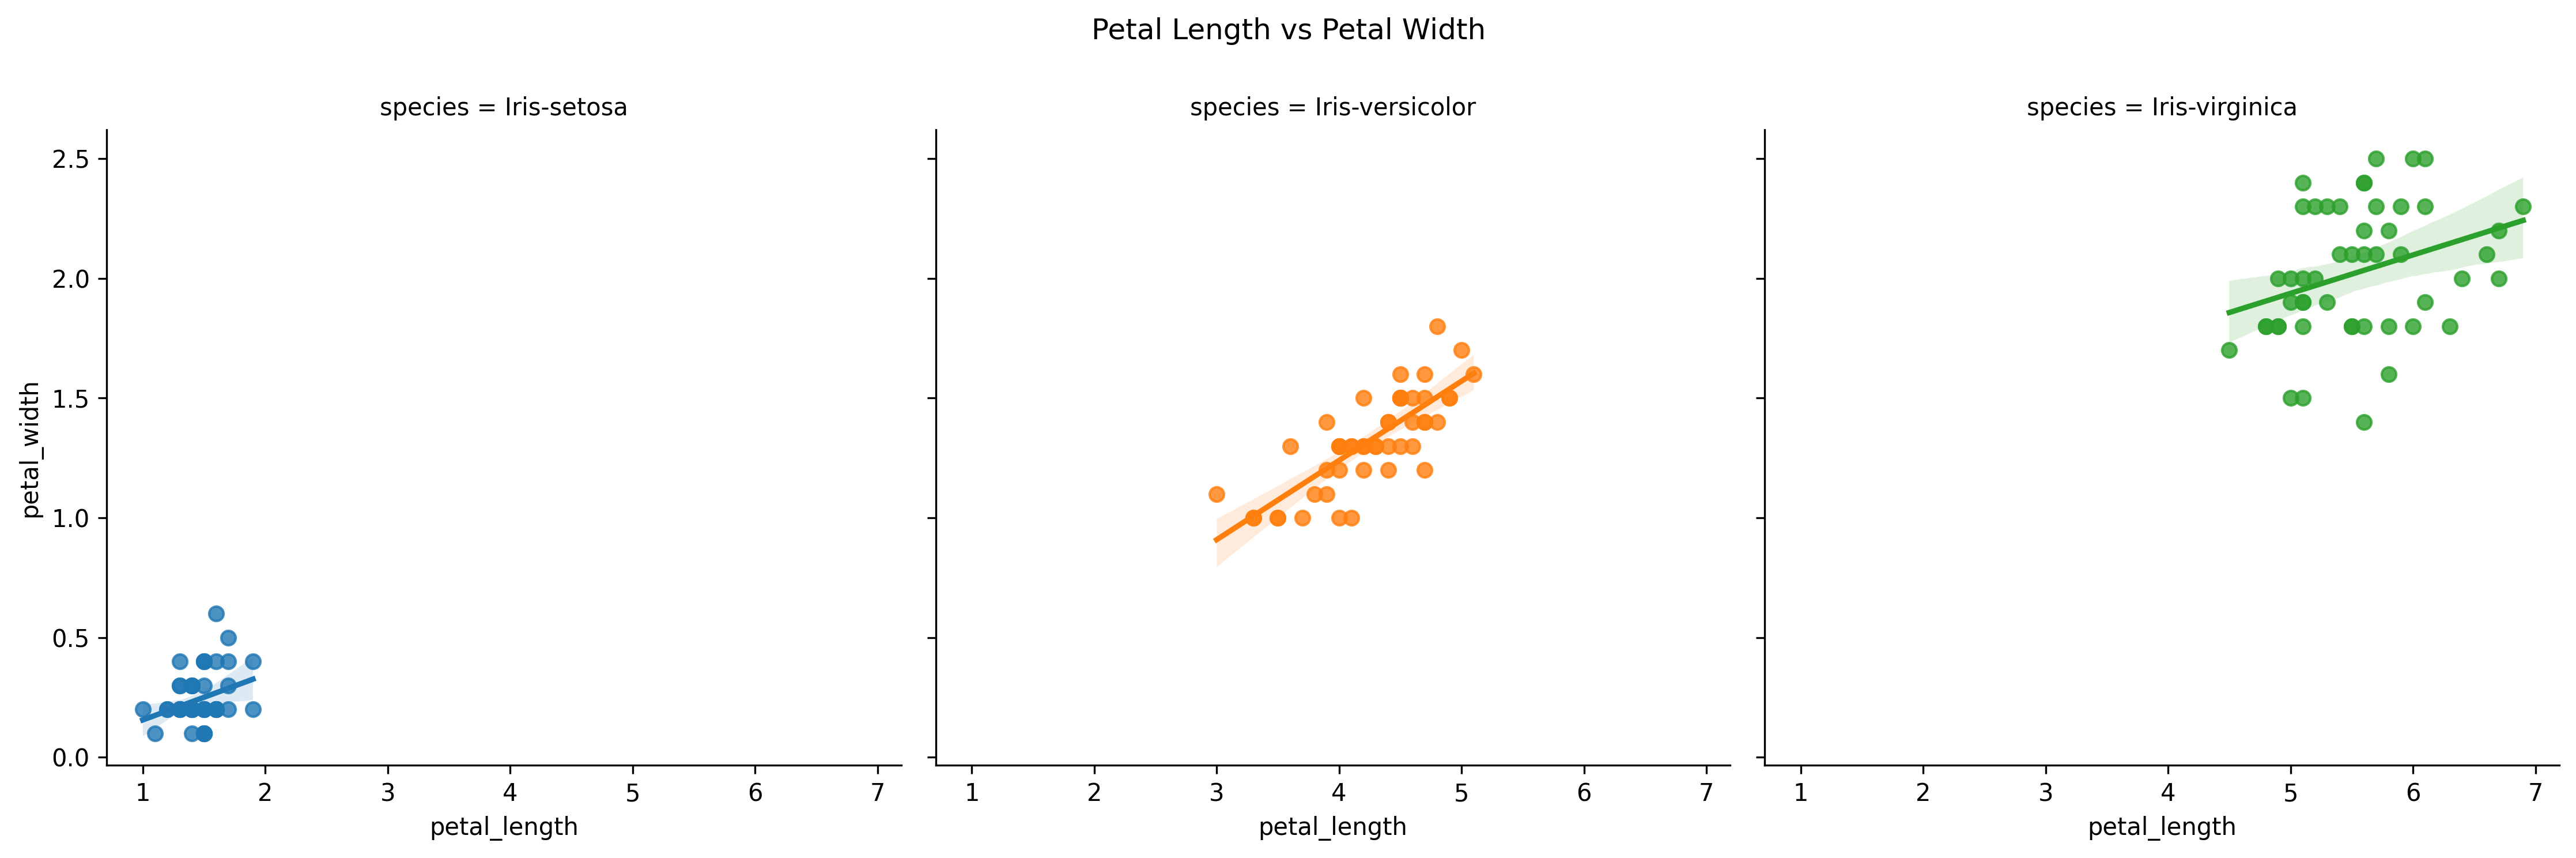

In [19]:
# Create lmplot() = regression + scatter plot
sns.lmplot(
    data=df,
    x='petal_length',
    y='petal_width',
    col='species', # separate plot per species
    hue='species',
)

# Add common labels
plt.subplots_adjust(top=0.85)
plt.suptitle("Petal Length vs Petal Width")

plt.show()

## Insights

*8. Write 3–5 insights based on the analysis.*

1. Petal features are highly discriminative
   - Petal length and width clearly separate species (especially setosa) from the other species.

2. Sepal features are less discriminative
   - Sepal length and width overlap significantly across species.

3. Petal length shows highest variation
   - Compared to other measured features, petal length displays the widest range of values, indicating it may contribute most significantly to distinguishing between the species.

4. Strong correlation between petal length and width
   - Petal dimensions are strongly positively correlated, especially for versicolor, suggesting proportional growth patterns in petals.

5. Petal dimensions of versicolor and virginica overlap
   - While setosa is mostly distinct, versicolor and virginica have overlaps, implying that differentiating these two species may require more nuanced.

## Reflection on Classifier

*9. Answer the reflection question: If you were to build a simple classifier to predict species, which feature(s) would you choose and why?*

If we were to build a simple classifier to predict Iris species, we would primarily choose: **petal length**, **petal width**.

These features are the most discriminative: setosa forms a completely separate cluster, and even though versicolor and virginica overlap slightly. Combining these two features provides enough information to separate the species much more effectively than sepal measurements.

Sepal length and width show significant overlap across species, so they would contribute little to the accuracy in a simple model.

These observations are clearly illustrated in the earlier visualizations, where species tend to cluster with respect to petal dimensions.

Using just the features petal length and width, even a simple model like a decision tree classifier could achieve high accuracy.

## Summary

*10. Summarize your findings in 2–3 sentences.*

The Iris dataset shows that petal length and width are the most discriminative features, clearly separating setosa and distinguish versicolor from virginica.

Sepal length and width overlap across species and are less useful for classification.

Overall, the strong correlation and high variation in petal dimensions make them key predictors for accurately identifying iris species, as we may see when we actually build our classifier. 